# Doctoral Recipients from U.S. Universities

NSF realeases its yearly report about docotral recipients: https://ncses.nsf.gov/pubs/nsf19301/report.
Below are some complementary figures for this report, emphasizing on gender and citizenship status. Data are openly available at https://ncses.nsf.gov/pubs/nsf19301/data. However, only tables with a variety of statistics are available to download, I have not found a way to pull the raw data yet.

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 18})

## Doctoral recipients stats by citizenship status, ethnicity and gender 
Data are read from a few different tables.

In [2]:
eth_res_male = [1153,1654,850,12688]
eth_alien_male = [633,7007,349,2255]
eth_res_female = [1387,1847,1559,12192]
eth_alien_female = [363,3744,183,1183]

eth_res = [2540,3502,2409,24880]
eth_alien = [996,10752,532,3438]

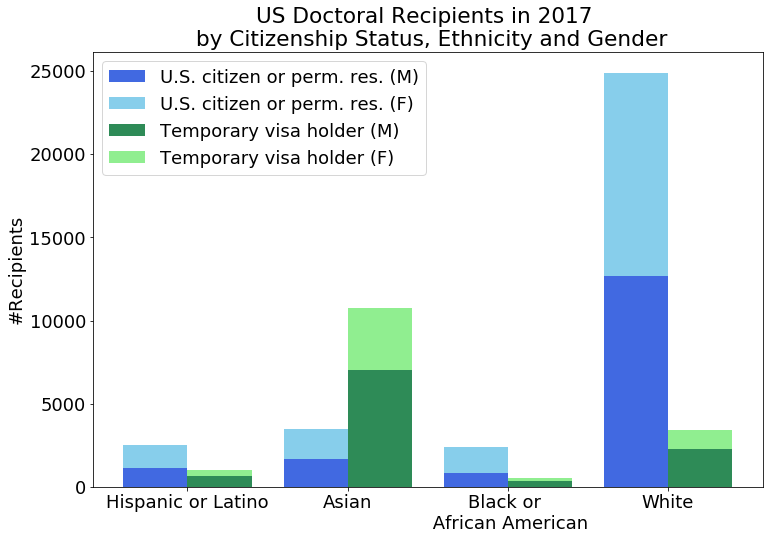

In [8]:
fig,ax = plt.subplots(figsize=(12,8))
ind = np.arange(4) 
width = 0.4
ax.bar(ind-width/2., eth_res_male, width, color='royalblue', label='U.S. citizen or perm. res. (M)')
ax.bar(ind-width/2., eth_res_female, width, bottom=eth_res_male, color='SkyBlue',\
       label='U.S. citizen or perm. res. (F)')
ax.bar(ind+width/2., eth_alien_male, width, color='seagreen', label='Temporary visa holder (M)')
ax.bar(ind+width/2., eth_alien_female, width, bottom=eth_alien_male, color='lightgreen',\
       label='Temporary visa holder (F)')

ax.set_xticks(ind)
ax.set_xticklabels(('Hispanic or Latino', 'Asian',\
                    'Black or \n African American', 'White'))
ax.legend(loc='upper left')
#ax.set_xlabel('Ethnicity')
ax.set_ylabel('#Recipients')
ax.set_title('US Doctoral Recipients in 2017 \n by Citizenship Status, Ethnicity and Gender')
fig.savefig('sed_stats_1.png',format='png')

1. Majority of doctoral graduate student workforce: White Americans and Asian internaltional students.
2. We have an almost 50-50 gender ratio for American PhDs but not so much for international students.

## Doctoral recipients stats by field of study, citizenship status and gender
A bit wrangling of data but straight-forward enough.

In [4]:
df = pd.read_excel('data_tables/sed17-sr-tab054.xlsx',header=3)

In [5]:
df_male = df[22:27].set_index('Characteristic').transpose()[['Male doctorate recipients (number)',\
                                                  'U.S. citizen or permanent resident','Temporary visa holder']]
df_male.columns = ['tot','citizen_frac','international_frac']
df_male['citizen'] = df_male.tot * df_male.citizen_frac/100.
df_male['international'] = df_male.tot * df_male.international_frac/100.
#df_male

df_female = df[40:45].set_index('Characteristic').transpose()[['Female doctorate recipients (number)',\
                                                  'U.S. citizen or permanent resident','Temporary visa holder']]
df_female.columns = ['tot','citizen_frac','international_frac']
df_female['citizen'] = df_female.tot * df_female.citizen_frac/100.
df_female['international'] = df_female.tot * df_female.international_frac/100.

df_fields = pd.concat((df_male[['citizen','international']],df_female[['citizen','international']]),axis=1)
df_fields.columns = ['male_citizen','male_int','female_citizen','female_int']

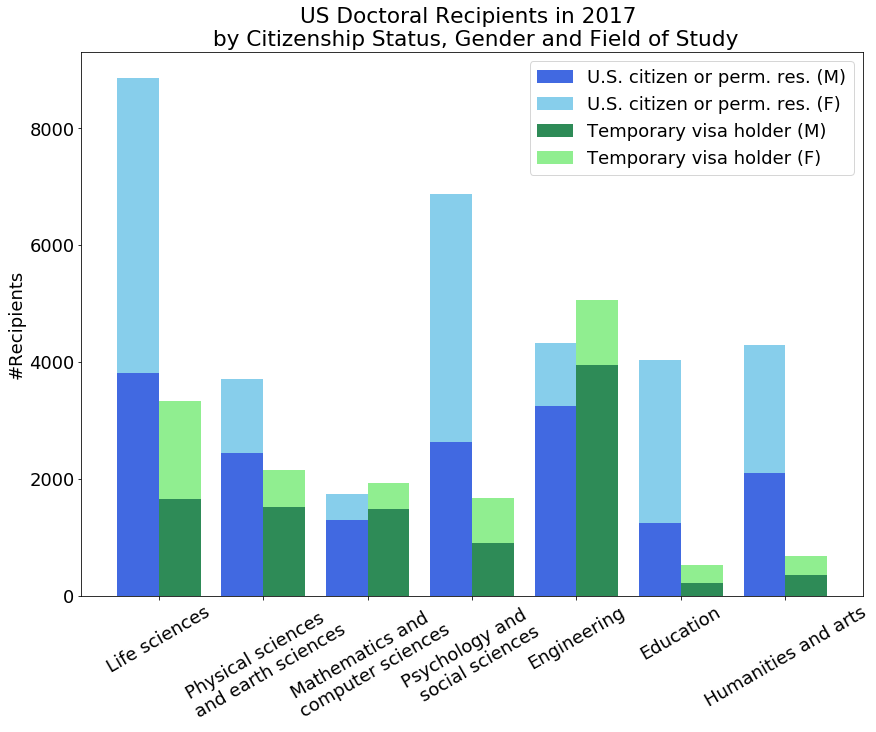

In [9]:
fig,ax = plt.subplots(figsize=(14,10))
ind = np.arange(7) 
width = 0.4
ax.bar(ind-width/2., df_fields[1:-1].male_citizen, width, color='royalblue', label='U.S. citizen or perm. res. (M)')
ax.bar(ind-width/2., df_fields[1:-1].female_citizen, width, bottom=df_fields[1:-1].male_citizen, color='SkyBlue',\
       label='U.S. citizen or perm. res. (F)')
ax.bar(ind+width/2., df_fields[1:-1].male_int, width, color='seagreen', label='Temporary visa holder (M)')
ax.bar(ind+width/2., df_fields[1:-1].female_int, width, bottom=df_fields[1:-1].male_int, color='lightgreen',\
       label='Temporary visa holder (F)')

fdict = {'fontsize': 18}
ax.set_xticks(ind)
ax.set_xticklabels(('Life sciences', 'Physical sciences \n and earth sciences',\
                    'Mathematics and \n computer sciences', 'Psychology and \n social sciences',\
                   'Engineering', 'Education', 'Humanities and arts'),fontdict=fdict)


for tick in ax.get_xticklabels():
    tick.set_rotation(30)
ax.legend(loc='upper right')
#ax.set_xlabel('Ethnicity')
ax.set_ylabel('#Recipients')
ax.set_title('US Doctoral Recipients in 2017 \n by Citizenship Status, Gender and Field of Study')
fig.savefig('sed_stats_2.png',format='png')

1. Now with a closer look the gender ratio isn't so nice in physical science, mathematics or engineering, even among American students, which fits our day-to-day knowledge.
2. More international students in engineering than domestic! Surprise!